In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
Data=pd.read_csv('C:\\Users\\ragha\\SVM\\SVMdataset.csv')

In [3]:
Data.head()

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [4]:
x = np.asarray(Data[['x1', 'x2']])
y= np.asarray(Data['y'])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40,random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.50,random_state=0)

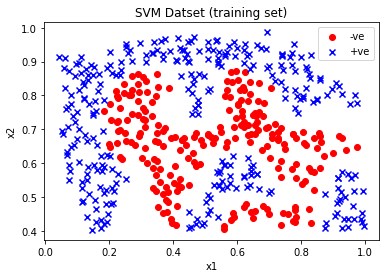

In [6]:
for l, c, m,labl in zip(range(0,2), ('red', 'blue'), ('o','x'),('-ve','+ve')):
    plt.scatter(x_train[y_train == l, 0],x_train[y_train == l, 1],color=c,marker=m,label=labl)
    plt.legend()
    
    
plt.title('SVM Datset (training set)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

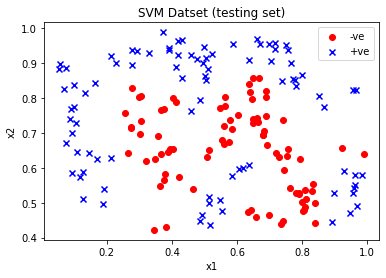

In [7]:
for l, c, m,labl in zip(range(0,2), ('red', 'blue'), ('o','x'),('-ve','+ve')):
    plt.scatter(x_test[y_test == l, 0],x_test[y_test == l, 1],color=c,marker=m,label=labl)
    plt.legend()
    
    
plt.title('SVM Datset (testing set)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

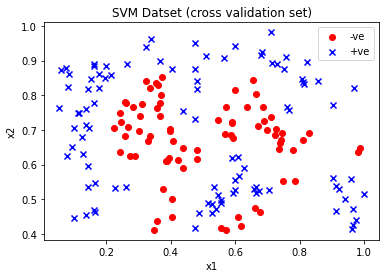

In [8]:
for l, c, m,labl in zip(range(0,2), ('red', 'blue'), ('o','x'),('-ve','+ve')):
    plt.scatter(x_valid[y_valid == l, 0],x_valid[y_valid == l, 1],color=c,marker=m,label=labl)
    plt.legend()
    
    
plt.title('SVM Datset (cross validation set)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [9]:
linear = svm.SVC(kernel='linear').fit(x_train, y_train)
y_pred = linear.predict(x_test)

In [10]:
d={}
for i in range (1,40,5):
    linear = svm.SVC(kernel='linear',C=i).fit(x_train, y_train)
    y_pred = linear.predict(x_test)
    f1 = metrics.f1_score(y_valid, y_pred)*100
    d[i]=f1
    print("F1 score: ",f1,"%")
   
    
max_key = max(d, key=d.get)
print("Best value of c is: ",max_key)
C=max_key

F1 score:  71.85185185185186 %
F1 score:  65.72769953051643 %
F1 score:  65.09433962264151 %
F1 score:  65.09433962264151 %
F1 score:  65.09433962264151 %
F1 score:  65.09433962264151 %
F1 score:  65.09433962264151 %
F1 score:  65.09433962264151 %
Best value of c is:  1


Confusion matrix for training set


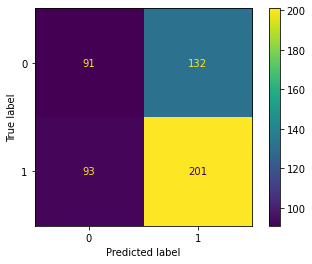

In [11]:
print('Confusion matrix for training set')
plot_confusion_matrix(linear, x_train, y_train)  
plt.show()

Confusion matrix for testing set


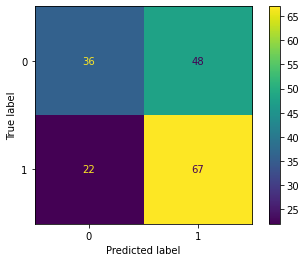

In [12]:
print('Confusion matrix for testing set')
plot_confusion_matrix(linear, x_test, y_test)  
plt.show()


Confusion matrix for cross validation set


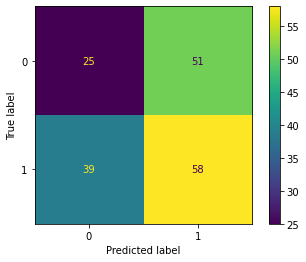

In [13]:
print('Confusion matrix for cross validation set')
plot_confusion_matrix(linear, x_valid, y_valid)  
plt.show()

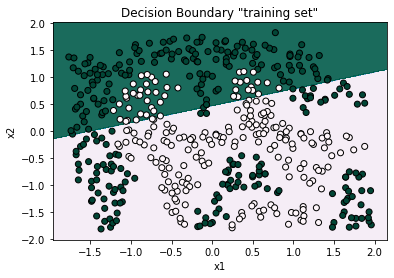

In [55]:
h = 0.01
x_min, x_max = x_train[:, 0].min() - 0.2, x_train[:, 0].max() + 0.2
y_min, y_max = x_train[:, 1].min() - 0.2, x_train[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

for i,clf in enumerate((linear,1)):
    ax2=plt.subplot(222, frameon=False)
    plt.delaxes(ax2)
    plt.subplots_adjust(wspace=0.8, hspace=0.8)
    
    Z = linear.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.9)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.PuBuGn, edgecolors='black')
    
    
plt.title('Decision Boundary "training set"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

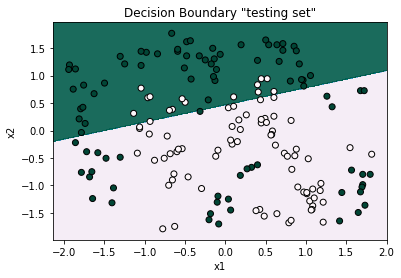

In [56]:
h = 0.01
x_min, x_max = x_test[:, 0].min() - 0.2, x_test[:, 0].max() + 0.2
y_min, y_max = x_test[:, 1].min() - 0.2, x_test[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

for i,clf in enumerate((linear,1)):
    ax2=plt.subplot(222, frameon=False)
    plt.delaxes(ax2)
    plt.subplots_adjust(wspace=0.8, hspace=0.8)
    
    Z = linear.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.9)
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=plt.cm.PuBuGn, edgecolors='black')
    
    
plt.title('Decision Boundary "testing set"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

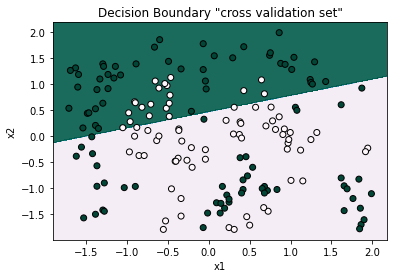

In [57]:
h = 0.01
x_min, x_max = x_valid[:, 0].min() - 0.2, x_valid[:, 0].max() + 0.2
y_min, y_max = x_valid[:, 1].min() - 0.2, x_valid[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

for i,clf in enumerate((linear,1)):
    ax2=plt.subplot(222, frameon=False)
    plt.delaxes(ax2)
    plt.subplots_adjust(wspace=0.8, hspace=0.8)
    
    Z = linear.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.9)
    plt.scatter(x_valid[:, 0], x_valid[:, 1], c=y_valid, cmap=plt.cm.PuBuGn, edgecolors='black')
    
    
plt.title('Decision Boundary "cross validation set"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [18]:
#accuracy = metrics.accuracy_score(y_train, y_pred)*100
#print("The accuracy score: ",accuracy,"%")

#f1 = metrics.f1_score(y_train, y_pred)*100
#print("The f1 score : ",f1,"%")

#Precision=metrics.precision_score(y_train, y_pred)*100
#print("The Precision score : ",Precision,"%")

#Recall=metrics.recall_score(y_train, y_pred)*100
#print("The Recall score : ",Recall,"%")

In [19]:
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("The accuracy score: ",accuracy,"%")

f1 = metrics.f1_score(y_test, y_pred)*100
print("The f1 score : ",f1,"%")


Precision=metrics.precision_score(y_test, y_pred)*100
print("The Precision score : ",Precision,"%")

Recall=metrics.recall_score(y_test, y_pred)*100
print("The Recall score : ",Recall,"%")

The accuracy score:  59.53757225433526 %
The f1 score :  65.68627450980391 %
The Precision score :  58.26086956521739 %
The Recall score :  75.28089887640449 %


In [20]:
print("For cross validation set")
accuracy = metrics.accuracy_score(y_valid, y_pred)*100
print("The accuracy score: ",accuracy,"%")

f1 = metrics.f1_score(y_valid, y_pred)*100
print("The f1 score : ",f1,"%")

Precision=metrics.precision_score(y_valid, y_pred)*100
print("The Precision score : ",Precision,"%")

Recall=metrics.recall_score(y_valid, y_pred)*100
print("The Recall score : ",Recall,"%")

For cross validation set
The accuracy score:  57.22543352601156 %
The f1 score :  65.09433962264151 %
The Precision score :  60.0 %
The Recall score :  71.1340206185567 %


In [21]:
#Starting of Guassian Kernel

In [24]:
rbf = svm.SVC(kernel='rbf', gamma='auto', C=C).fit(x_train, y_train)

In [25]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = rbf,param_grid = parameters,scoring = 'f1',cv = 10,n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)

In [26]:
f1 = grid_search.best_score_*100
print(grid_search.best_params_)
print("F1= ",f1)
C=grid_search.best_params_['C']
print(C)
gamma=grid_search.best_params_['gamma']
print(gamma)

{'C': 1000, 'gamma': 0.8, 'kernel': 'rbf'}
F1=  84.59147844587697
1000
0.8


In [27]:
rbf_pred = rbf.predict(x_test)


In [28]:
cm_rbf = confusion_matrix(y_test, rbf_pred)


Confusion matrix for training set


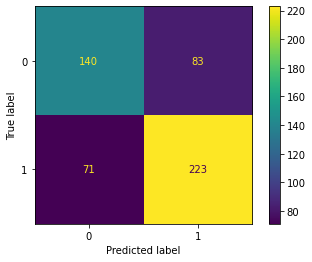

In [29]:
print('Confusion matrix for training set')
plot_confusion_matrix(rbf, x_train, y_train)  
plt.show()

Confusion matrix for testing set


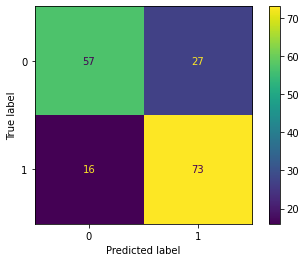

In [30]:
print('Confusion matrix for testing set')
plot_confusion_matrix(rbf, x_test, y_test)  
plt.show()

Confusion matrix for cross validation set


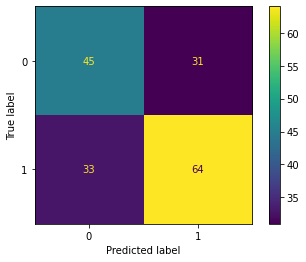

In [31]:
print('Confusion matrix for cross validation set')
plot_confusion_matrix(rbf, x_valid, y_valid)  
plt.show()

<ipython-input-53-00f329badc2d>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 1,1)


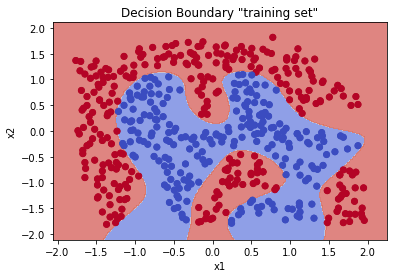

In [53]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)

h = 0.01 
rbf = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(x_train, y_train)

x_min, x_max = x_train[:, 0].min() - 0.3, x_train[:, 0].max() + 0.3
y_min, y_max = x_train[:, 1].min() - 0.3, x_train[:, 1].max() + 0.3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))


for i, clf in enumerate((1,rbf)):
    plt.subplot(1, 1,1)
    plt.subplots_adjust(wspace=0.8, hspace=0.8)
    Z = rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    
plt.title('Decision Boundary "training set"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

<ipython-input-54-18c1a2d43f90>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 1,1)


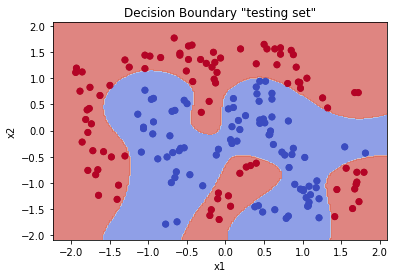

In [54]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_test = sc.fit_transform(x_test)
h=0.02


rbf = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(x_test, y_test)

x_min, x_max = x_test[:, 0].min() - 0.3, x_test[:, 0].max() + 0.3
y_min, y_max = x_test[:, 1].min() - 0.3, x_test[:, 1].max() + 0.3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))


for i, clf in enumerate((rbf,1)):
    plt.subplot(1, 1,1)
    plt.subplots_adjust(wspace=0.8, hspace=0.8)
    Z = rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
plt.title('Decision Boundary "testing set"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

<ipython-input-52-7cb9ae313395>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 1,1)


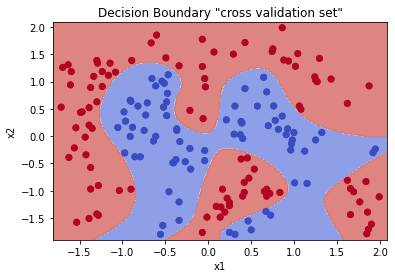

In [52]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_valid = sc.fit_transform(x_valid)

h=0.01 
rbf = svm.SVC(kernel='rbf', gamma=0.8, C=C).fit(x_valid, y_valid)

x_min, x_max = x_valid[:, 0].min() - 0.1, x_valid[:, 0].max() + 0.1
y_min, y_max = x_valid[:, 1].min() - 0.1, x_valid[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))


for i, clf in enumerate((rbf,1)):
    plt.subplot(1, 1,1)
    plt.subplots_adjust(wspace=0.8, hspace=0.8)
    Z = rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
    plt.scatter(x_valid[:, 0], x_valid[:, 1], c=y_valid, cmap=plt.cm.coolwarm,)
    
plt.title('Decision Boundary "cross validation set"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


In [35]:
#accuracy = metrics.accuracy_score(y_train, rbf_pred)*100
#print("The accuracy score: ",accuracy,"%")

#f1 = metrics.f1_score(y_train, rbf_pred)*100
#print("The f1 score : ",f1,"%")

#Precision=metrics.precision_score(y_train, rbf_pred)*100
#print("The Precision score : ",Precision,"%")

#Recall=metrics.recall_score(y_train, rbf_pred)*100
#print("The Recall score : ",Recall,"%")

In [36]:
accuracy = metrics.accuracy_score(y_test, rbf_pred)*100
print("The accuracy score: ",accuracy,"%")

f1 = metrics.f1_score(y_test, rbf_pred)*100
print("The f1 score : ",f1,"%")

Precision=metrics.precision_score(y_test, rbf_pred)*100
print("The Precision score : ",Precision,"%")

Recall=metrics.recall_score(y_test, rbf_pred)*100
print("The Recall score : ",Recall,"%")

The accuracy score:  75.14450867052022 %
The f1 score :  77.24867724867724 %
The Precision score :  73.0 %
The Recall score :  82.02247191011236 %


In [37]:
print("For cross validation set")
accuracy = metrics.accuracy_score(y_valid, rbf_pred)*100
print("The accuracy score: ",accuracy,"%")

f1 = metrics.f1_score(y_valid, rbf_pred)*100
print("The f1 score : ",f1,"%")

Precision=metrics.precision_score(y_valid, rbf_pred)*100
print("The Precision score : ",Precision,"%")

Recall=metrics.recall_score(y_valid, rbf_pred)*100
print("The Recall score : ",Recall,"%")

For cross validation set
The accuracy score:  49.71098265895954 %
The f1 score :  55.83756345177665 %
The Precision score :  55.00000000000001 %
The Recall score :  56.70103092783505 %
